# Part 1

## (a)

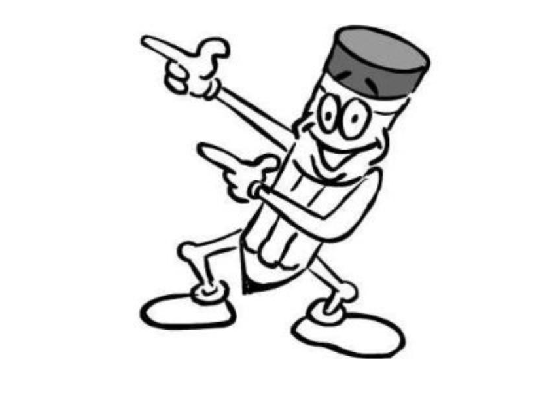

In [1]:
addpath('func/');
if exist('large.jpg', 'file') ~= 2
    addpath('../HW1/');
    img = imread('CARTOON.jpg');
    img = im2double(img);
    addpath('../HW1/func');
    img = interpo(img, size(img, 1) * 2);
    imwrite(uint8(255 * mat2gray(img)), 'large.jpg');
end
I = imread('large.jpg');
imshow(I);

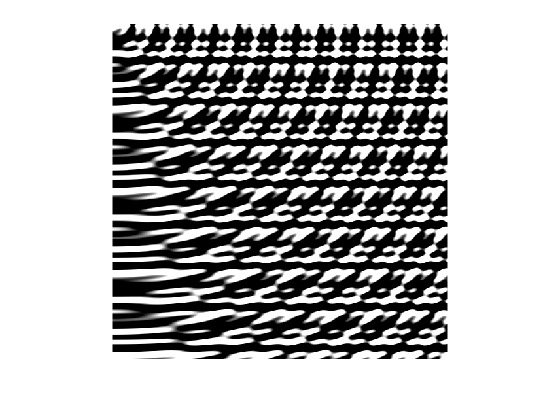

In [2]:
y = meshgrid(1:size(I, 1), 1:size(I, 2));
x = y';
img1 = sin(0.2 .* x) + sin(0.3 .* x) + cos(0.4 .* x) + ...
    sin(sqrt(x .* x + y .* y) .* 0.15) + sin(sqrt(x .* x + y .* y) .* 0.35);
imshow(img1);

In [3]:
%%file func/vis_fft.m
function [mag, phs] = vis_fft(img)
    fourier = fftshift(fft2(img));
    mag = abs(fourier);
    f = figure;
    imshow(log(mag), []);
    title("Magnitude");
    fourier(mag < 1e-6) = 0;
    phs = angle(fourier);
    f = figure;
    imshow(unwrap(phs), []);
    colormap('gray');
    title("Phase");
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW2/func/vis_fft.m'.


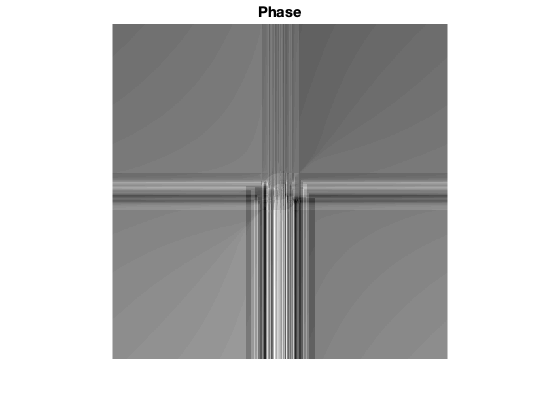

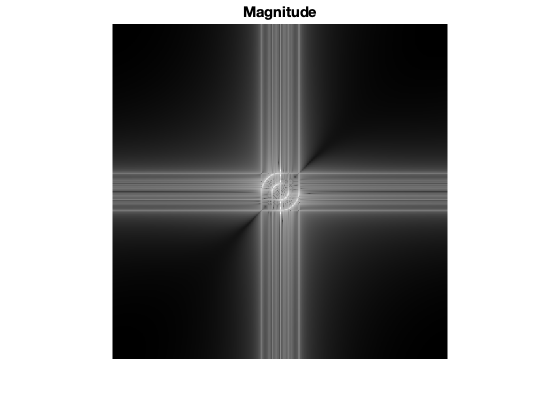

In [4]:
[mag, phs] = vis_fft(img1);

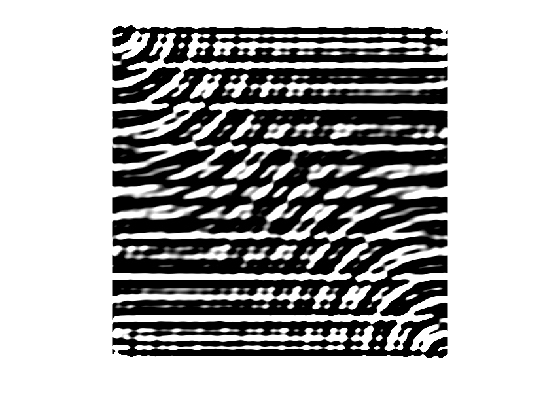

In [5]:
invImg = ifft2(ifftshift(mag) .* 2);
imshow(invImg);

The image shows a mirrored wave at the symmetric side of the original picture.

## (b)

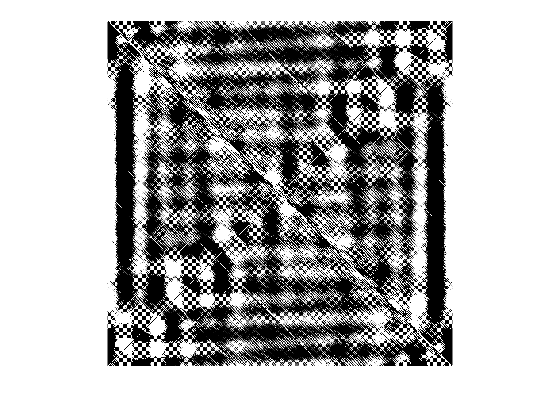

In [6]:
img2 = imread('Cross.jpg');
img2 = im2double(img2);
fourier = fft2(img2);
imshow(real(fourier));

# Part 2

In [7]:
%%file func/notch.m
function fimg = notch(img, centFreq)
    fourier = fftshift(fft2(img));
    mag = log(abs(fourier));
    minVal = min(min(mag));
    maxVal = max(max(mag));
    f = figure;
    imshow(mag, []);
    title('Log Magnitude');
    ampthres = 0.5 * maxVal;
    outlier = mag > ampthres;
    hfsize = round(size(outlier, 1) / 2);
    outlier(hfsize - centFreq:hfsize + centFreq, :) = 0;
    fourier(outlier) = 0;
    fimg = ifft2(fftshift(fourier));
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW2/func/notch.m'.


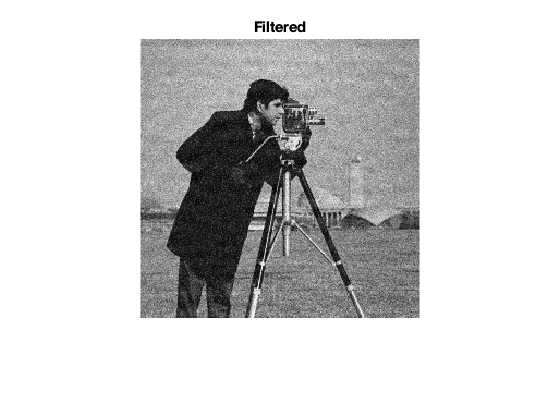

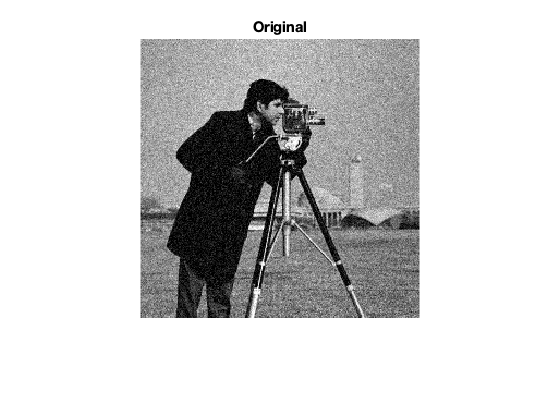

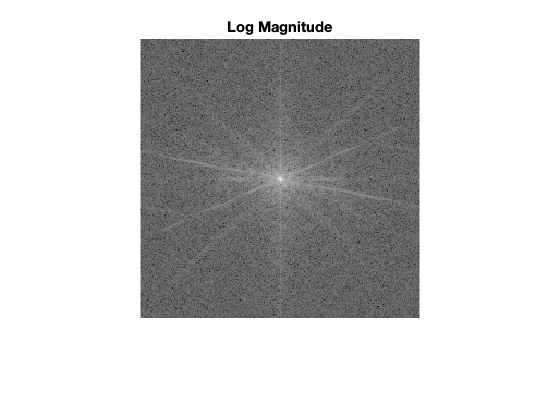

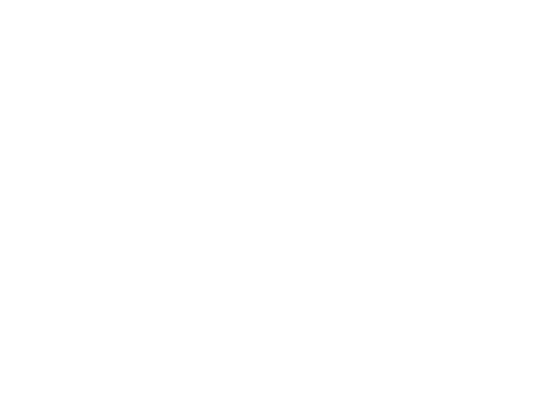

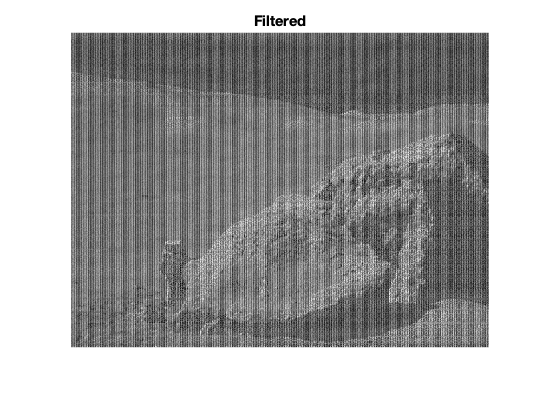

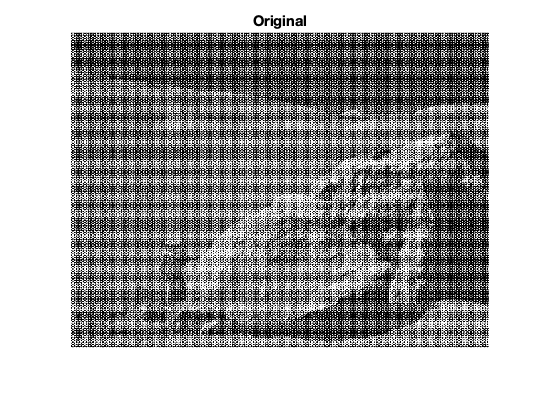

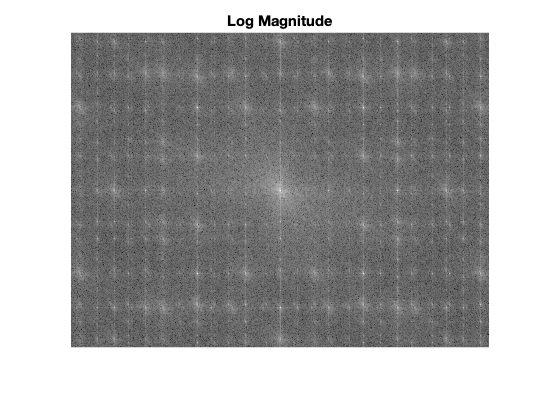

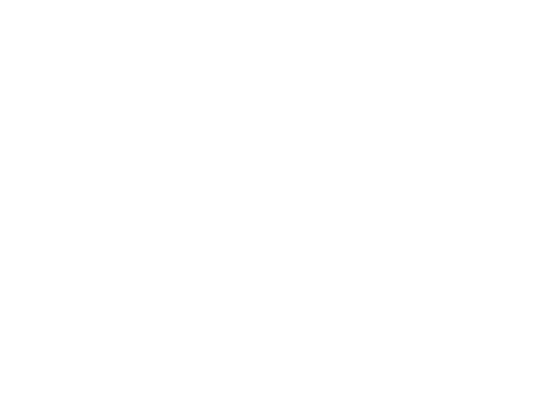

In [8]:
paths = ["moonlanding.png", "psnr2.png"];
for path = paths
    f = figure;
    img3 = imread(path);
    img3 = im2double(img3);
    if size(img3, 3) == 3
        img3 = rgb2gray(img3);
    end
    fimg = notch(img3, 10);
    f = figure;
    imshow(img3);
    title('Original');
    f = figure;
    imshow(real(fimg), []);
    title('Filtered');
end;